In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from seaborn import heatmap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
files=files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
dataset=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**1. Data Cleaning**

In [4]:
# Check For Null Values
print(dataset.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# For Duplicate Columns if present
print(len(dataset))
print(len(dataset.drop_duplicates()))


1470
1470


In [6]:

# Checking For Unique Values
print(dataset["BusinessTravel"].unique())
print(dataset["EmployeeCount"].unique())
print(dataset["StandardHours"].unique())
print(dataset["Over18"].unique())


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1]
[80]
['Y']


In [0]:
# Removing Unwanted Columns
columns_to_remove = ["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"]
dataset.drop(columns=columns_to_remove, inplace=True)


**2. Visualization of different features in dataset**.

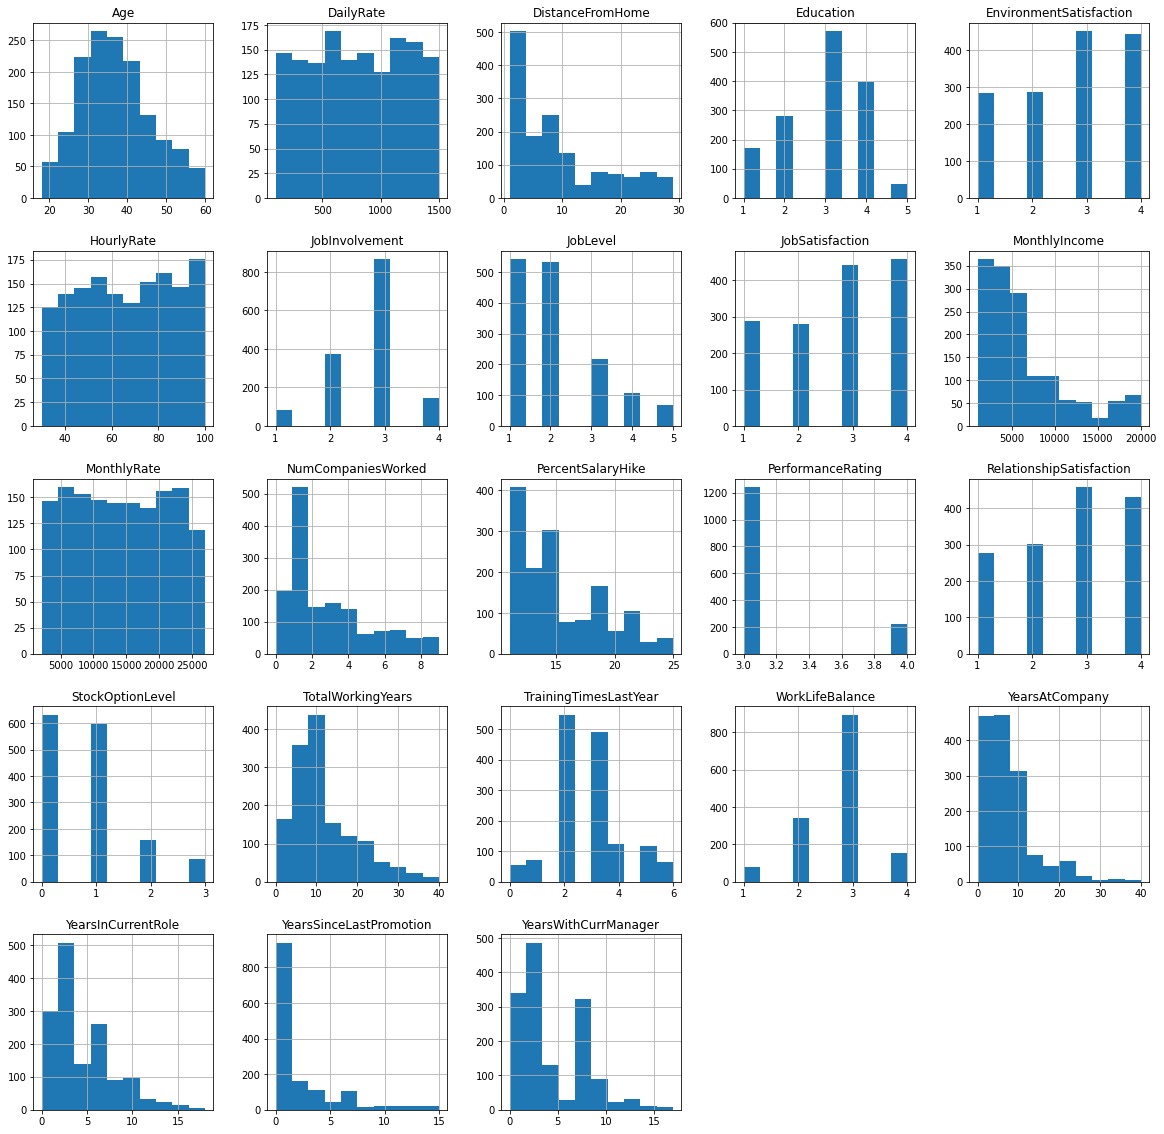

In [8]:
# Data-Set Visualization
# Variations Of Data In respective columns
dataset.hist()
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

**3. Correlation b/w Different Features**

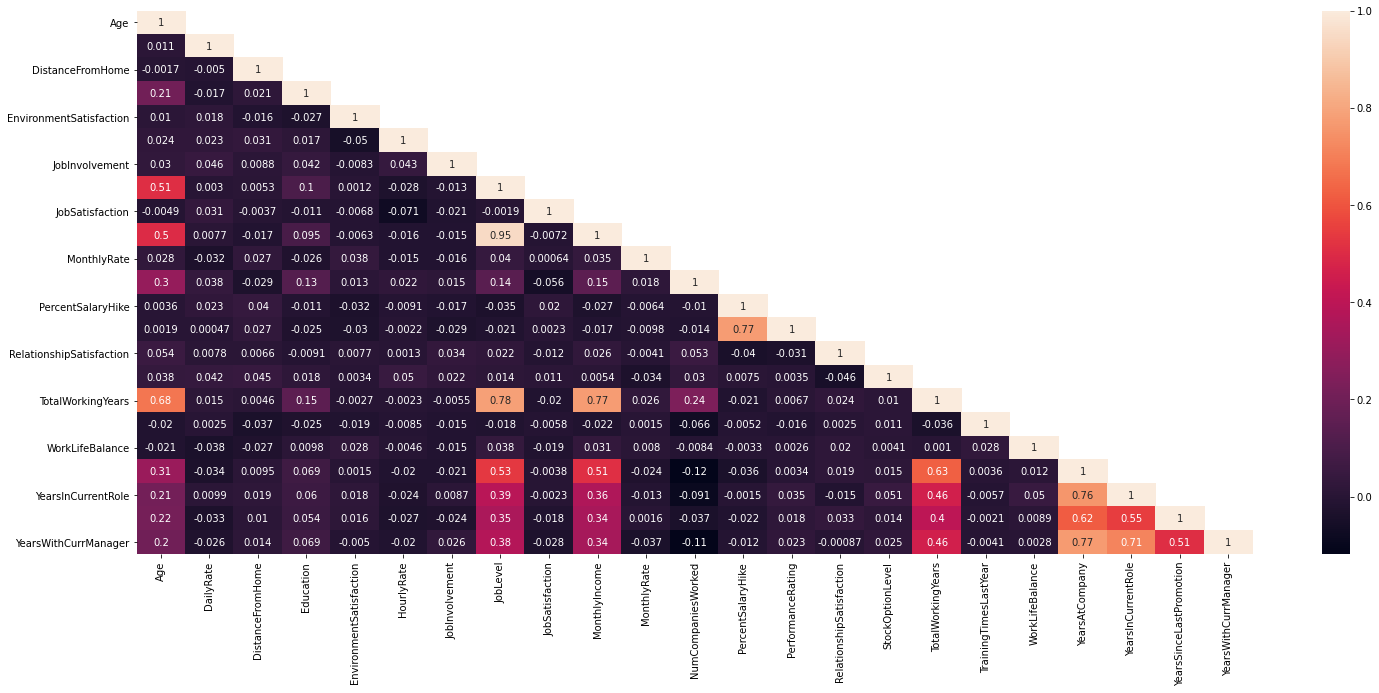

In [9]:
# Correlation
cor_mat = dataset.corr()
mask = np.array(cor_mat)
# Taking the lower triangle
mask[np.tril_indices_from(mask)] = False
heatmap(dataset.corr(),annot=True, mask=mask, cbar=True)
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()


###### SOME INFERENCES FROM THE ABOVE HEATMAP

1. Self relation i.e. of a feature to itself is equal to 1 as expected.

2. JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

3. MonthlyIncome is very strongly related to joblevel as expected as senior employees will definitely earn more.

4. PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

5. Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

6. YearsWithCurrManager is highly related to YearsAtCompany.

7. YearsAtCompany is related to YearsInCurrentRole.



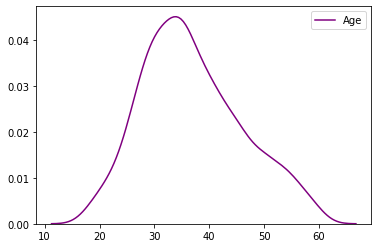

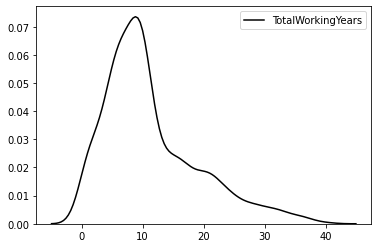

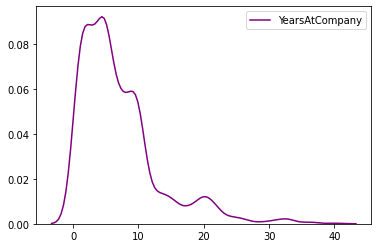

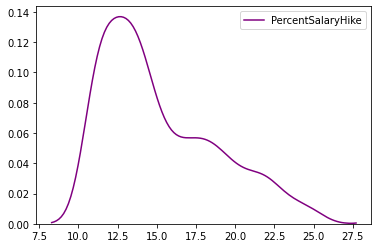

In [10]:
# KDE
sns.kdeplot(dataset['Age'], color='purple')
plt.show()
sns.kdeplot(dataset['TotalWorkingYears'], color='black')
plt.show()
sns.kdeplot(dataset['YearsAtCompany'], color='purple')
plt.show()
sns.kdeplot(dataset['PercentSalaryHike'], color='purple')
plt.show()



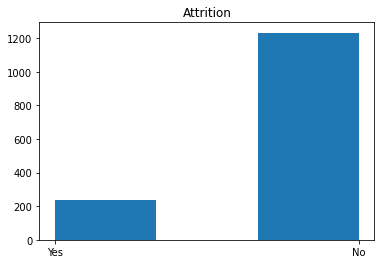

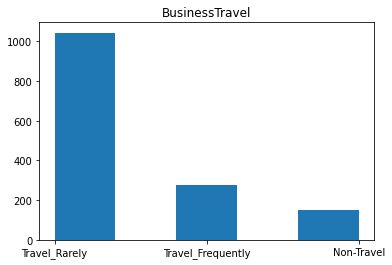

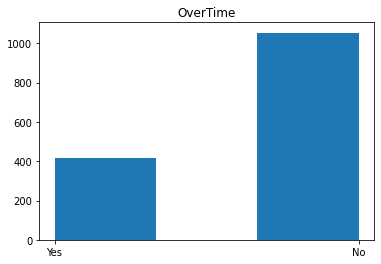

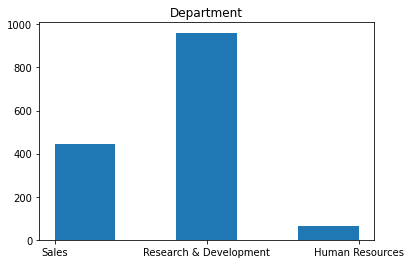

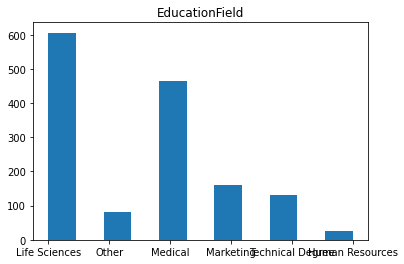

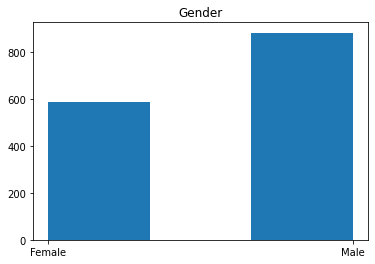

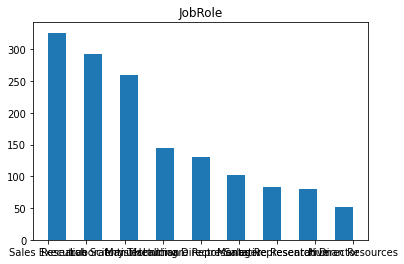

In [11]:
# Variations
plt.title('Attrition')
plt.hist(dataset['Attrition'], bins=3)
plt.show()

plt.title('BusinessTravel')
plt.hist(dataset['BusinessTravel'], bins=5)
plt.show()

plt.title('OverTime')
plt.hist(dataset['OverTime'], bins=3)
plt.show()

plt.title('Department')
plt.hist(dataset['Department'], bins=5)
plt.show()

plt.title('EducationField')
plt.hist(dataset['EducationField'], bins=11)
plt.show()

plt.title('Gender')
plt.hist(dataset['Gender'], bins=3)
plt.show()

plt.title('JobRole')
plt.hist(dataset['JobRole'], bins=17)
plt.show()

# Encoding Columns
dataset.loc[:, "Attrition"] = LabelEncoder().fit_transform(dataset.loc[:, "Attrition"])
dataset.loc[:, "BusinessTravel"] = LabelEncoder().fit_transform(dataset.loc[:, "BusinessTravel"])
dataset.loc[:, "Department"] = LabelEncoder().fit_transform(dataset.loc[:, "Department"])
dataset.loc[:, "EducationField"] = LabelEncoder().fit_transform(dataset.loc[:, "EducationField"])
dataset.loc[:, "Gender"] = LabelEncoder().fit_transform(dataset.loc[:, "Gender"])
dataset.loc[:, "JobRole"] = LabelEncoder().fit_transform(dataset.loc[:, "JobRole"])
dataset.loc[:, "MaritalStatus"] = LabelEncoder().fit_transform(dataset.loc[:, "MaritalStatus"])
dataset.loc[:, "OverTime"] = LabelEncoder().fit_transform(dataset.loc[:, "OverTime"])

In [12]:
# Data-Set Columns
print(dataset.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


**4. Splitting the Dataset**

Note from the attrition curve above we have an **imbalanced dataset** with majority of observations being of one type ('NO') in our case. In this dataset for example we have about **84%** of observations having 'No' and only **16%** of 'Yes' and hence this is an imbalanced dataset.

To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected,
therefore what we do in this approach is to either **increase** the number of observations corressponding to the **minority class** (oversampling) or **decrease** the number of observations for the **majority class** (undersampling).

Now, in our case the number of observations is already pretty low and so **oversampling** will be more **appropriate**.

Below I have used an oversampling technique known as the **SMOTE**(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the **minority class** so that the net observations of both the class get balanced out.


In [13]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import make_scorer


# Data-Set Extract
X = dataset.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                      18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]].values
y = dataset.iloc[:, 1].values

# Scaling The Values
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled = np.append(arr=np.ones((len(X_scaled), 1)).astype(float), values=X_scaled, axis=1)

# Splitting Data-Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0, test_size=0.4)

# OverSampling
Smote = SMOTE(random_state=0)
X_train_Over, y_train_Over = Smote.fit_sample(X_train, y_train)

# UnderSampling
NearMiss = NearMiss()
X_train_Under, y_train_Under = NearMiss.fit_sample(X_train, y_train)

# Scoring
scoring = make_scorer(balanced_accuracy_score)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

**4.1 Hyperparamater Tuning**

**Hyperparamater Tuning** is done to increase the selected models performance, done by tuning the parameters

Also the different model functions are build 

In [0]:
# Logistic Regression
def Logistic_Grid():
    parameter = [{'penalty': ["l2", "none"]}]
    return parameter


def Decision_Grid():
    parameter = [{'criterion': ["gini", "entropy"]}]
    return parameter


def Random_Grid():
    parameter = [{'criterion': ["gini", "entropy"],
                  'n_estimators': [100, 200, 300, 400, 500]}]
    return parameter


def K_NN_Grid():
    parameter = [{'n_neighbors': [3, 5, 7]}]
    return parameter


def SVM_Grid():
    parameter = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                 {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
                  'gamma': [0.1, 0.001, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
    return parameter

# Hyperparameter Tuning

def Scores_And_GridSearch(string, value):
    global parameters

    if value == 0:
        x, y_ = X_train, y_train
    elif value == 1:
        x, y_ = X_train_Over, y_train_Over
    else:
        x, y_ = X_train_Under, y_train_Under

    if string == "Logistic":
        parameters = Logistic_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring='accuracy',
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_accuracy = grid_search.best_score_
        print(best_accuracy)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "Decision":
        parameters = Decision_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring='accuracy',
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_accuracy = grid_search.best_score_
        print(best_accuracy)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "Random":
        parameters = Random_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring='accuracy',
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_accuracy = grid_search.best_score_
        print(best_accuracy)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "K":
        parameters = K_NN_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring='accuracy',
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_accuracy = grid_search.best_score_
        print(best_accuracy)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "SVM":
        parameters = SVM_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring='accuracy',
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_accuracy = grid_search.best_score_
        print(best_accuracy)
        best_parameters = grid_search.best_params_
        print(best_parameters)


def score_calculator():
    print("Accuracy :", balanced_accuracy_score(y_test, predictions))
    print("Confusion metric :", confusion_matrix(y_test, predictions))
    print("f1_Score :", f1_score(y_test, predictions))
    print("Precision :", precision_score(y_test, predictions))
    print("Recall :", recall_score(y_test, predictions))


**5. Building A Model & Making Predictions**

In this section I have used different models stated above and trained them on the previously oversampled data and then used them for the prediction purposes.

In [15]:
# Logistic Classifier (Original Sample)
print("Logistic Classifier (Original Sample)")
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Logistic", 0)

# Logistic Classifier (Original Sample) With Parameter Tuned
print("Logistic Classifier (Original Sample) With Tuned Parameter")
classifier = LogisticRegression(penalty='none')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

# Logistic Classifier (Over Sampling)
print("=" * 40)
print("Logistic Classifier (Over Sampling)")
classifier = LogisticRegression()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Logistic", 1)

# Logistic Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Logistic Classifier (Over Sampling) With Parameter Tuned")
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()


Logistic Classifier (Original Sample)
Accuracy : 0.6545454545454545
Confusion metric : [[483  12]
 [ 62  31]]
f1_Score : 0.4558823529411765
Precision : 0.7209302325581395
Recall : 0.3333333333333333
0.8582609805924413
{'penalty': 'l2'}
Logistic Classifier (Original Sample) With Tuned Parameter
Accuracy : 0.659921798631476
Confusion metric : [[483  12]
 [ 61  32]]
f1_Score : 0.4671532846715329
Precision : 0.7272727272727273
Recall : 0.34408602150537637
Logistic Classifier (Over Sampling)
Accuracy : 0.7594982078853046
Confusion metric : [[374 121]
 [ 22  71]]
f1_Score : 0.49824561403508766
Precision : 0.3697916666666667
Recall : 0.7634408602150538
0.77712814855672
{'penalty': 'l2'}
Logistic Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.7594982078853046
Confusion metric : [[374 121]
 [ 22  71]]
f1_Score : 0.49824561403508766
Precision : 0.3697916666666667
Recall : 0.7634408602150538


In [16]:
# Naive Bayes Classifier (Original Sample)
print("=" * 40)
print("Naive Bayes Classifier (Original Sample)")
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

# Naive Bayes Classifier (Over Sampling)
print("=" * 40)
print("Naive Bayes Classifier (Over Sampling)")
classifier = GaussianNB()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()


Naive Bayes Classifier (Original Sample)
Accuracy : 0.7269468882372108
Confusion metric : [[395 100]
 [ 32  61]]
f1_Score : 0.48031496062992124
Precision : 0.37888198757763975
Recall : 0.6559139784946236
Naive Bayes Classifier (Over Sampling)
Accuracy : 0.683088954056696
Confusion metric : [[309 186]
 [ 24  69]]
f1_Score : 0.39655172413793105
Precision : 0.27058823529411763
Recall : 0.7419354838709677


In [17]:

# Decision Tree Classifier (Original Sample)
print("=" * 40)
print("Decision Tree Classifier (Original Sample)")
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Decision", 0)

# Decision Tree Classifier (Original Sample) with parameter Tuned
print("=" * 40)
print("Decision Tree Classifier (Original Sample) With Parameter Tuned")
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

# Decision Tree Classifier (Over Sampling)
print("=" * 40)
print("Decision Tree Classifier (Over Sampling)")
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Decision", 1)

# Decision Tree Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Decision Tree Classifier (Over Sampling), With Parameter Tuned")
classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()


Decision Tree Classifier (Original Sample)
Accuracy : 0.589247311827957
Confusion metric : [[429  66]
 [ 64  29]]
f1_Score : 0.30851063829787234
Precision : 0.30526315789473685
Recall : 0.3118279569892473
0.7845760980592441
{'criterion': 'entropy'}
Decision Tree Classifier (Original Sample) With Parameter Tuned
Accuracy : 0.6316063864450961
Confusion metric : [[439  56]
 [ 58  35]]
f1_Score : 0.3804347826086956
Precision : 0.38461538461538464
Recall : 0.3763440860215054
Decision Tree Classifier (Over Sampling)
Accuracy : 0.6133919843597263
Confusion metric : [[405  90]
 [ 55  38]]
f1_Score : 0.34389140271493207
Precision : 0.296875
Recall : 0.40860215053763443
0.8666482809339952
{'criterion': 'gini'}
Decision Tree Classifier (Over Sampling), With Parameter Tuned
Accuracy : 0.6133919843597263
Confusion metric : [[405  90]
 [ 55  38]]
f1_Score : 0.34389140271493207
Precision : 0.296875
Recall : 0.40860215053763443


In [18]:
# Random Forest Classifier (Original Sample)
print("=" * 40)
print("Random Forest Classifier (Original Sample)")
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Random", 0)

# Random Forest Classifier (Original Sample) With Parameter Tuned
print("=" * 40)
print("Random Forest Classifier (Original Sample) With Parameter Tuned")
classifier = RandomForestClassifier(criterion='gini', n_estimators=300)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

# Random Forest Classifier (Over Sampling)
print("=" * 40)
print("Random Forest Classifier (Over Sampling)")
classifier = RandomForestClassifier()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Random", 1)

# Random Forest Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Random Forest Classifier (Over Sampling) With Parameter Tuned")
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

Random Forest Classifier (Original Sample)
Accuracy : 0.5850114043662431
Confusion metric : [[494   1]
 [ 77  16]]
f1_Score : 0.2909090909090909
Precision : 0.9411764705882353
Recall : 0.17204301075268819
0.8537282941777324
{'criterion': 'gini', 'n_estimators': 200}
Random Forest Classifier (Original Sample) With Parameter Tuned
Accuracy : 0.5893776474421636
Confusion metric : [[493   2]
 [ 76  17]]
f1_Score : 0.3035714285714286
Precision : 0.8947368421052632
Recall : 0.1827956989247312
Random Forest Classifier (Over Sampling)
Accuracy : 0.627663734115347
Confusion metric : [[483  12]
 [ 67  26]]
f1_Score : 0.3969465648854961
Precision : 0.6842105263157895
Recall : 0.27956989247311825
0.9452151130722559
{'criterion': 'gini', 'n_estimators': 200}
Random Forest Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.6300097751710655
Confusion metric : [[480  15]
 [ 66  27]]
f1_Score : 0.4
Precision : 0.6428571428571429
Recall : 0.2903225806451613


In [19]:
print("=" * 40)
print("K-NN Classifier (Original Data)")
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("K", 0)

# K-NN Classifier (Original Data) With Parameter Tuned
print("=" * 40)
print("K-NN Classifier (Original Data) With Parameter Tuned")
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

# K-NN Classifier (Over Sampling)
print("=" * 40)
print("K-NN Classifier (Over Sampling)")
classifier = KNeighborsClassifier()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("K", 1)

# K-NN Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("K-NN Classifier (Over Sampling) with Parameter Tuned")
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

K-NN Classifier (Original Data)
Accuracy : 0.5433365917236885
Confusion metric : [[490   5]
 [ 84   9]]
f1_Score : 0.16822429906542055
Precision : 0.6428571428571429
Recall : 0.0967741935483871
0.8447139938712972
{'n_neighbors': 7}
K-NN Classifier (Original Data) With Parameter Tuned
Accuracy : 0.559107201042685
Confusion metric : [[479  16]
 [ 79  14]]
f1_Score : 0.22764227642276424
Precision : 0.4666666666666667
Recall : 0.15053763440860216
K-NN Classifier (Over Sampling)
Accuracy : 0.648159009449332
Confusion metric : [[317 178]
 [ 32  61]]
f1_Score : 0.3674698795180723
Precision : 0.25523012552301255
Recall : 0.6559139784946236
0.8299227799227799
{'n_neighbors': 3}
K-NN Classifier (Over Sampling) with Parameter Tuned
Accuracy : 0.6361355490387748
Confusion metric : [[353 142]
 [ 41  52]]
f1_Score : 0.3623693379790941
Precision : 0.26804123711340205
Recall : 0.5591397849462365


In [0]:

# Support Vector Classifier (Original Sample)
print("=" * 40)
print("Support Vector Classifier (Original Sample)")
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("SVM", 0)

# Support Vector Classifier (Original Sample) With Parameter Tuned
print("=" * 40)
print("Support Vector Classifier (Original Sample) With Parameter Tuned")
classifier = SVC(kernel='rbf', C=1000, gamma=0.01)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

# Support Vector Classifier (Over Sampling)
print("=" * 40)
print("Support Vector Classifier (Over Sampling)")
classifier = SVC(kernel='rbf')
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
# Scores_And_GridSearch("SVM", 1)

# Support Vector Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Support Vector Classifier (Over Sampling) With Parameter Tuned")
classifier = SVC(kernel='rbf', C=10, gamma=0.2)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

**6. Comparing the above stated model on the basis of different evaluation matrix** i.e.

*   Accuracy
*   Precision
*   Recall
*   Area under ROC Curve



In [21]:
# oversampler=SMOTE(random_state=42)
# x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

def compare(model):
    clf=model
    clf.fit(X_train_Over, y_train_Over)
    pred=clf.predict(X_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))  

acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
model_names=['rbfSVM','LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.840136,0.473118,0.494382,0.698093
1,LogisticRegression,0.756803,0.763441,0.369792,0.657118
2,RandomForestClassifier,0.867347,0.301075,0.682927,0.782048
3,GradientBoostingClassifier,0.870748,0.354839,0.673469,0.781076
4,DecisionTreeClassifier,0.753401,0.408602,0.296875,0.588655
5,KNeighborsClassifier,0.642857,0.655914,0.255230,0.581770


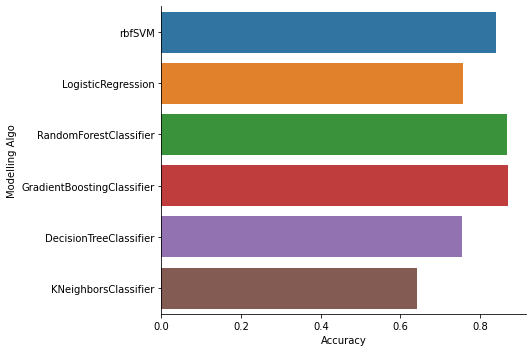

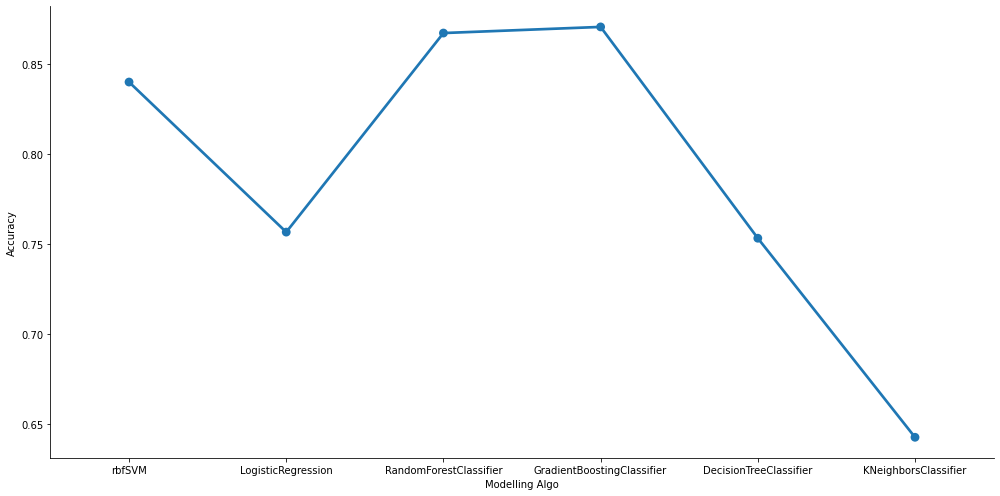

In [22]:
def comp_models(met_df,metric):
    sns.catplot(data=met_df,x=metric,y='Modelling Algo',height=5,aspect=1.5,kind='bar')
    sns.catplot(data=met_df,y=metric,x='Modelling Algo',height=7,aspect=2,kind='point')

comp_models(met_df,'Accuracy')

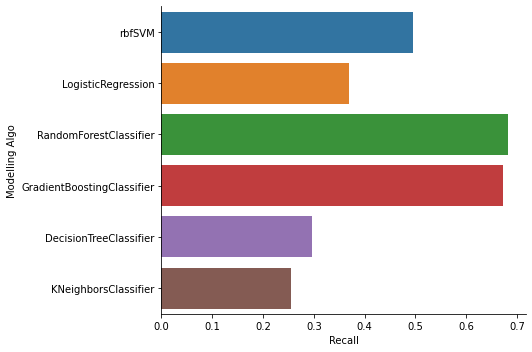

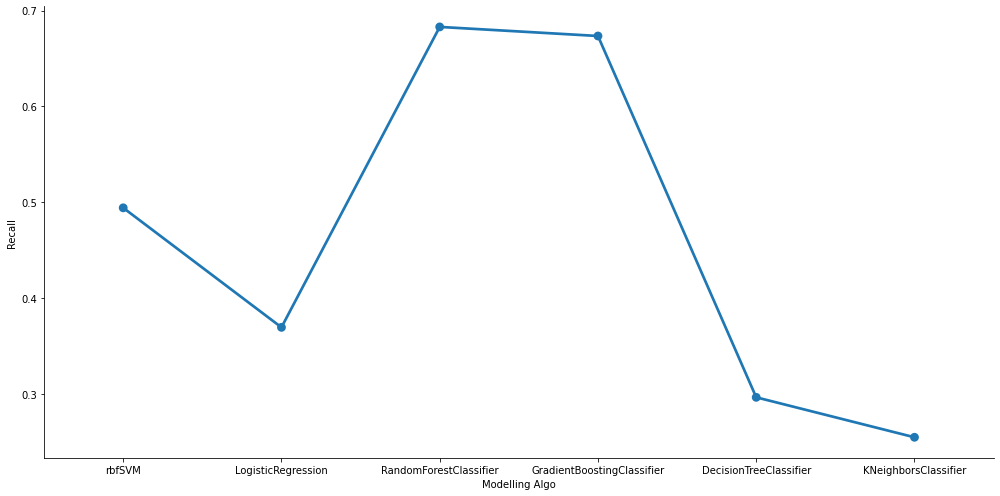

In [23]:
comp_models(met_df,'Recall')

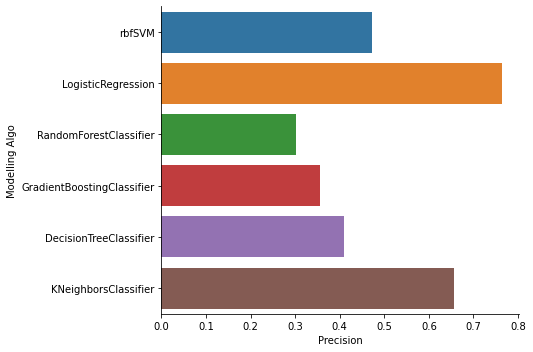

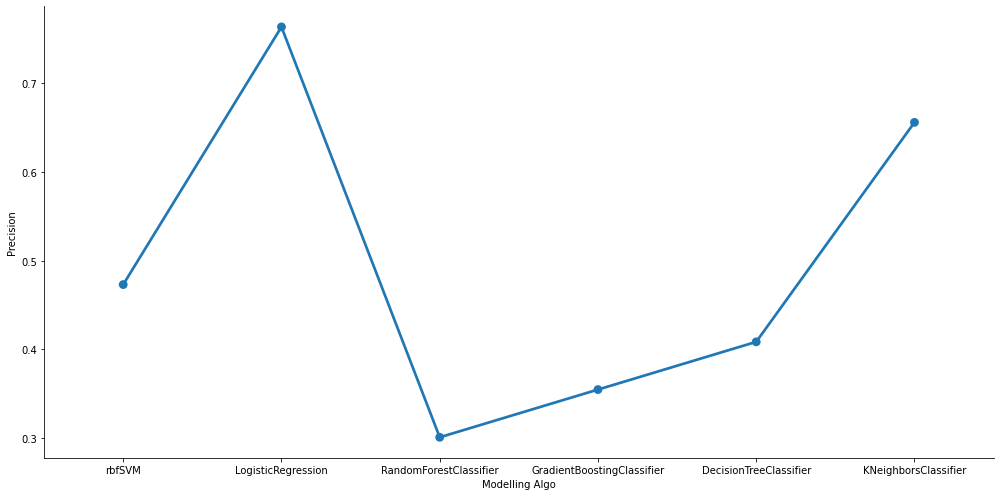

In [24]:
comp_models(met_df,'Precision')

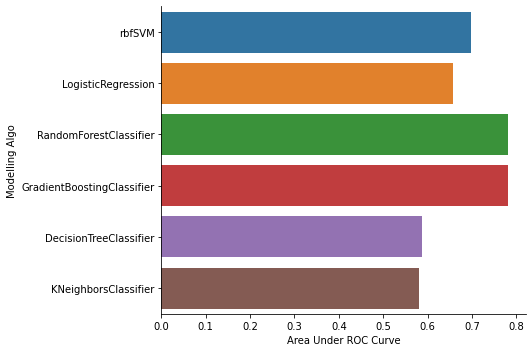

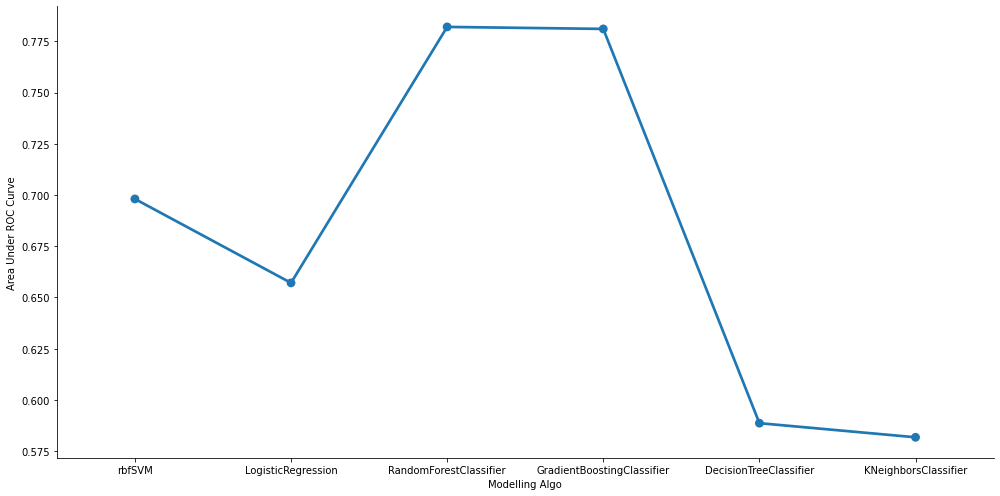

In [25]:
comp_models(met_df,'Area Under ROC Curve')

**7. Conclusion**



*   Gradient Boosting Classifier model gives the highest accuracy of 87% when overasampled dataset is used as compare to the other models. But since the data is **imbalanced** and whatever operation we apply on it, accuracy will always give **biased result** i.e. High Accuracy. 
*   The best model is Random Forest Classifier with oversampling
because we are getting a good balanced accuracy around 86%
And a recall about 68%


